In [37]:
from configure_dataframes import directory_to_dataframe
from check_labels import load_model, get_features, scale_and_reduce, plot_features, display_misclassified_images, train_and_identify_misclassifications, train_and_plot_svm

In [41]:
df = directory_to_dataframe("data")

In [42]:
to_check = [
    "australia_assa_02",
    "australia_assa_62",
    "india_ooty_01",
    "glasgow_59",
    "swiss_landschlacht_01",
    "alaska_haarp_62",
    "humain_59",
]

In [43]:
df = df[df.instrument.isin(['australia_assa_02'])]
df.loc[:, "is_burst"] = df["burst_type"].apply(lambda x: 1 if x != "no_burst" else 0)

In [46]:
df

,label,start_time,file_path,instrument,burst_type,is_burst
25,burst,2021-11-01 01:29:00,data/2/2021-11-01 01-29-00_2021-11-01 01-30-00...,australia_assa_02,2,1
99,burst,2021-11-01 01:40:00,data/2/2021-11-01 01-40-00_2021-11-01 01-41-00...,australia_assa_02,2,1
127,burst,2021-11-01 01:48:00,data/2/2021-11-01 01-48-00_2021-11-01 01-49-00...,australia_assa_02,2,1
136,burst,2021-11-01 01:36:00,data/2/2021-11-01 01-36-00_2021-11-01 01-37-00...,australia_assa_02,2,1
137,burst,2021-09-17 04:20:00,data/2/2021-09-17 04-20-00_2021-09-17 04-21-00...,australia_assa_02,2,1
...,...,...,...,...,...,...
88200,no_burst,2021-11-26 06:44:00,data/no_burst/2021-11-26 06-44-00_2021-11-26 0...,australia_assa_02,no_burst,0
88201,no_burst,2021-08-02 23:32:00,data/no_burst/2021-08-02 23-32-00_2021-08-02 2...,australia_assa_02,no_burst,0
88207,no_burst,2021-05-20 07:59:00,data/no_burst/2021-05-20 07-59-00_2021-05-20 0...,australia_assa_02,no_burst,0
88208,no_burst,2021-11-09 21:08:00,data/no_burst/2021-11-09 21-08-00_2021-11-09 2...,australia_assa_02,no_burst,0


In [47]:
df.sort_values(by="start_time", inplace=True).to_excel("df.xlsx")

In [32]:
# Take sample
df = df.groupby('label').sample(n=200)
df = df.sort_values(by=['start_time'])

In [33]:
image_paths = df['file_path'].values

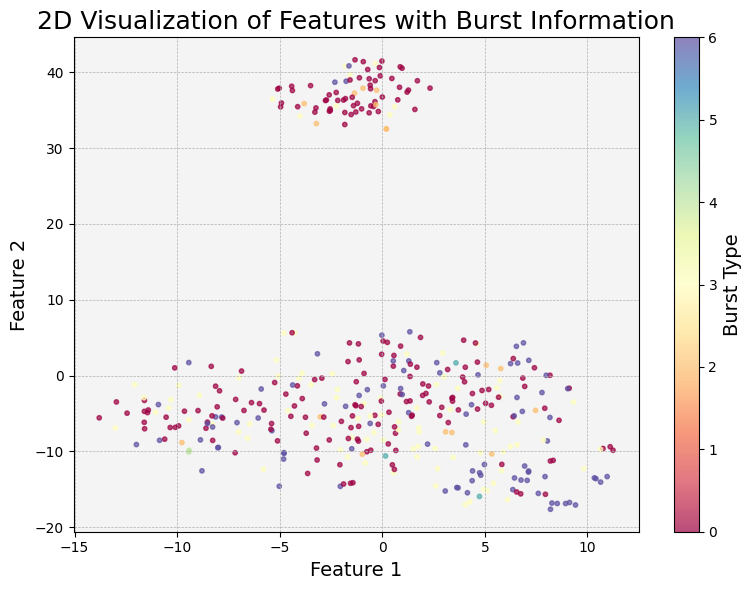

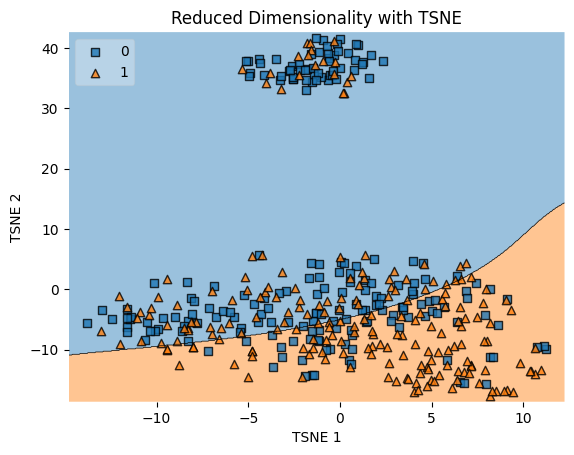

Number of misclassified images: 153


In [34]:
# Load your dataframe and perform your preprocessing here...
model = load_model()
features_list = [get_features(path, model, True) for path in image_paths]
low_dim_features = scale_and_reduce(features_list)

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(clf, low_dim_features, df['is_burst'].values, df)
print(f"Number of misclassified images: {len(df_missclassified)}")

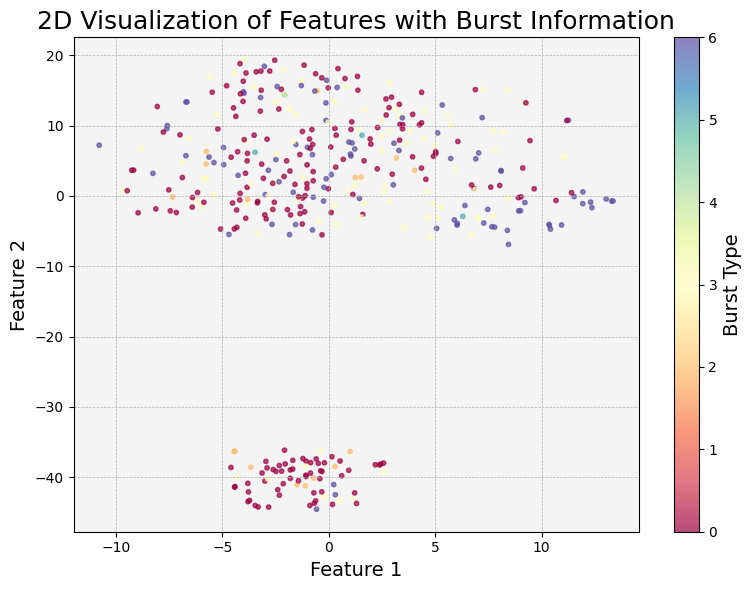

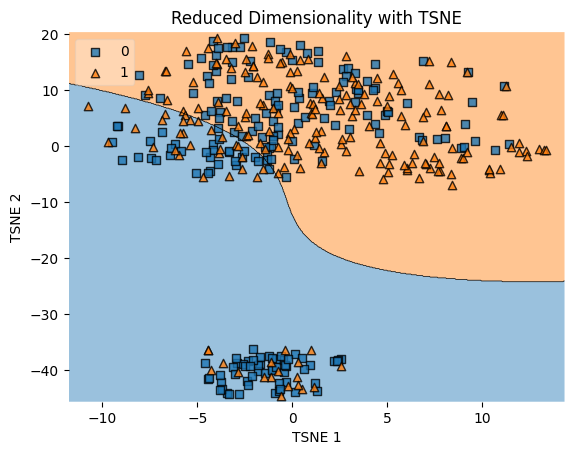

Number of misclassified images: 159


In [35]:
# Load your dataframe and perform your preprocessing here...
model = load_model()
features_list = [get_features(path, model, False) for path in image_paths]
low_dim_features = scale_and_reduce(features_list)

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(clf, low_dim_features, df['is_burst'].values, df)
print(f"Number of misclassified images: {len(df_missclassified)}")

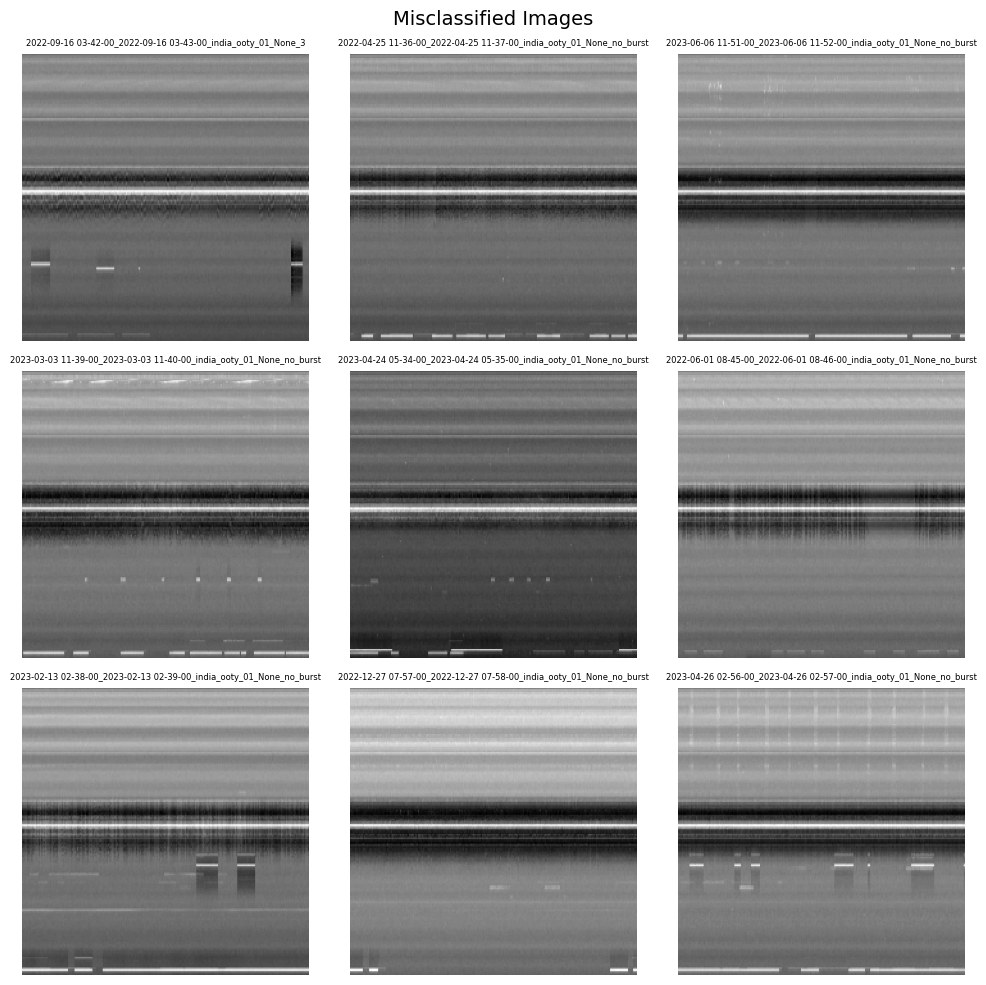

In [36]:
df_missclassified = train_and_identify_misclassifications(clf, X=low_dim_features, y=df["is_burst"].values, df=df)

# Displaying misclassified images
display_misclassified_images(df_missclassified)